# **Práctico 5 (Parte 2): Graficar grupos en dos ejes**

### Tabla de Contenidos
1. [Consigna](#1.-Consigna)
2. [Inicialización del entorno](#2.-Inicialización-del-entorno)
3. [Carga de los datos](#3.-Carga-de-los-datos)
4. [Preparación de los datos](#4.-Preparación-de-los-datos)
5. [Exploración de dialogos positivos y negativos](#5.-Exploración-de-dialogos-positivos-y-negativos)
6. [Visualización](#6.-Visualización)
7. [Conclusiones](#7.-Conclusiones)

## 1. Consigna

En este ejercicio se solicita realizar un gráfico de todos los diálogos en el dataset completo en el cual se represente a los diálogos con calificación positiva con un punto de un color y a los de calificación negativa con otro color. El eje *x* será la duración del diálogo en cantidad de turnos y el eje *y* serán la cantidad de caracteres escritos por el estudiante en ese diálogo dividido la cantidad de turnos del estudiante para ese diálogo (es decir, el promedio de cantidad de caracteres por turno del estudiante para el diálogo). ¿Ven grupos en el gráfico en alguno de los dos ejes?   

## 2. Inicialización del entorno

In [126]:
#Librerías 
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
from ast import literal_eval
import itertools
import random

# Algunas utilidades
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


# Gráficos
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

## 3. Carga de los datos 

El archivo yup_curated_data.csv fue generado a partir del archivo yup_messages_preprocessed.csv y datadump-20150801-20171219.csv. La curación de dicho archivo fue realizada en la notebook [Practico_3y4_part_2y3_preparacion](https://github.com/giannipablo/MentoriaDiploDatos2020/blob/master/Practico_3y4_part_2y3_preparacion.ipynb)

In [49]:
#1 Carga de los datos de las sesiones
filename = 'yup_curated_data.csv'
datos_curados = pd.read_csv(os.path.join('..', 'dataset', filename))

#2 Carga de los datos crudos de los turnos para su visualización
filename = 'yup_messages_preprocessed.csv'
turnos = pd.read_csv(os.path.join('..', 'dataset', filename))

## 4. Preparación de los datos 

A continuación trabajaremos con la columna `tokens_student` para calcular nuevas columnas, tales como:
* cantidad de caracteres de los turnos del estudiante por cada diálogo
* cantidad de mensajes por cada diálogo
* promedio de caracteres del estudiante por cada diálogo

Dichas columnas junto con la variable `student_rating_cat` nos permitirán visualizar **la cantidad de mensajes por diálogo del estudiante** respecto a la **cantidad promedio de caracteres utilizados por el estudiante por diálogo**, y verificar si es posible identificar agrupamientos en nuestros datos.

In [11]:
#1. Obtenemos una columna con la cantidad de caracteres de los turnos del estudiante de cada dialogo
dialogos = datos_curados.dropna(subset=['tokens_student'])
dialogos['tokens_student'] = dialogos.tokens_student.apply(lambda x: (literal_eval(str(x))))
dialogos['text_student'] = dialogos.tokens_student.apply(lambda x: (' '.join(x)))
dialogos['len_chars_student'] = dialogos.text_student.apply(lambda x: len(x))  

#2. Obtenemos una columna con el número o cantidad de mensajes de cada dialogo
dialogos['n_msg'] = dialogos['n_msg_student'] + dialogos['n_msg_tutor']

#3. Obtenemos el Promedio de caracteres del estudiante
dialogos['avg_chars_student'] = dialogos['len_chars_student'] / dialogos['n_msg_student'] 

#4. Nos quedamos con las columnas que nos sirven para la visualización
dialogos = dialogos[['n_msg','avg_chars_student','student_rating_cat']]

## 5. Exploración de dialogos positivos y negativos

In [174]:
#1 función para mostrar un dialogo
def mostrar_dialogo(session_id, turnos, clase = ''):
    text_color = bcolors.OKBLUE if clase == 'Positivo' else bcolors.FAIL
    print(f'\n\n{bcolors.BOLD}Sesión #{session_id}{bcolors.ENDC} {text_color}{bcolors.BOLD}[{clase}]{bcolors.ENDC}\n')
    turnos_dialogo = turnos[turnos.session_id == session_id]
    for i, turno in turnos_dialogo.iterrows():
        sf = turno['sent_from']
        if sf == 'tutor' or sf == 'student':
            msg = ' '.join(literal_eval(turno['text']))
            text_color = bcolors.OKBLUE if sf == 'tutor' else bcolors.OKGREEN
            print(f'-{sf}: {text_color}{msg}{bcolors.ENDC}')

In [175]:
#2 Seleccionamos algunos dialogos positivos y negativos aleatoriamente 
n_dialogos_positivos = 5
n_dialogos_negativos = 5
ids_dialogos_positivos = list(datos_curados[datos_curados.student_rating_cat == 1]['session_id'])
ids_dialogos_negativos = list(datos_curados[datos_curados.student_rating_cat == 0]['session_id'])
dialogos_positivos_random = random.sample(ids_dialogos_positivos, n_dialogos_positivos)
dialogos_negativos_random = random.sample(ids_dialogos_negativos, n_dialogos_negativos)

#3 Mostramos los dialogos positivos
print(f'\n{bcolors.UNDERLINE}{bcolors.BOLD}DIALOGOS POSITIVOS{bcolors.ENDC}\n')
for sid in dialogos_positivos_random:
    mostrar_dialogo(sid, turnos, 'Positivo')

    
#4 Mostramos los dialogos negativos
print(f'\n\n{bcolors.UNDERLINE}{bcolors.BOLD}DIALOGOS NEGATIVOS{bcolors.ENDC}\n')
for sid in dialogos_negativos_random:
    mostrar_dialogo(sid, turnos, 'Negativo')


DIALOGOS POSITIVOS



Sesión #325042 [Positivo]

-student: <url>
-tutor: Hello Lucy !
-student: hi !
-tutor: Which problem do you need help with ?
-student: the pic I sent . It 's only 1 problem
-tutor: Oh , I just got the image . Please hold on just a moment while I look over your problem
-student: sure
-tutor: Thanks . Have you already tried any work on this problem ?
-student: Yeah . i ve just defined what h ( d ) means .
-student: I have n't really written  anything down tho
-tutor: Alright
-tutor: What do you think that H(R ) = 4 means ?
-student: well I know that R = distance in meters and H= height of the ball
-tutor: Is R the distance in meters ?
-student: Yeah I think so
-tutor: Ok ! So what does d stand for ?
-student: the basketball 's height
-tutor: Uhm , no , not really . Let 's review the instructions . What does the problem say about d ?
-student: oh right sorry . it says that d is the distance in meters
-tutor: That 's right ! So , H(d ) is the function that defined th

## 6. Visualización

Visualizaremos cómo se relaciona la cantidad de mensajes por diálogo del estudiante respecto a la cantidad promedio de caracteres utilizados por el estudiante por diálogo discriminados por la categoría de cada diálogo, donde la **categoría positiva** se corresponde a un puntaje asignado por el estudiante igual a 4 o 5  y la **categoría negativa** se corresponde a un puntaje asignado por el estudiante igual a 1 o 2. 

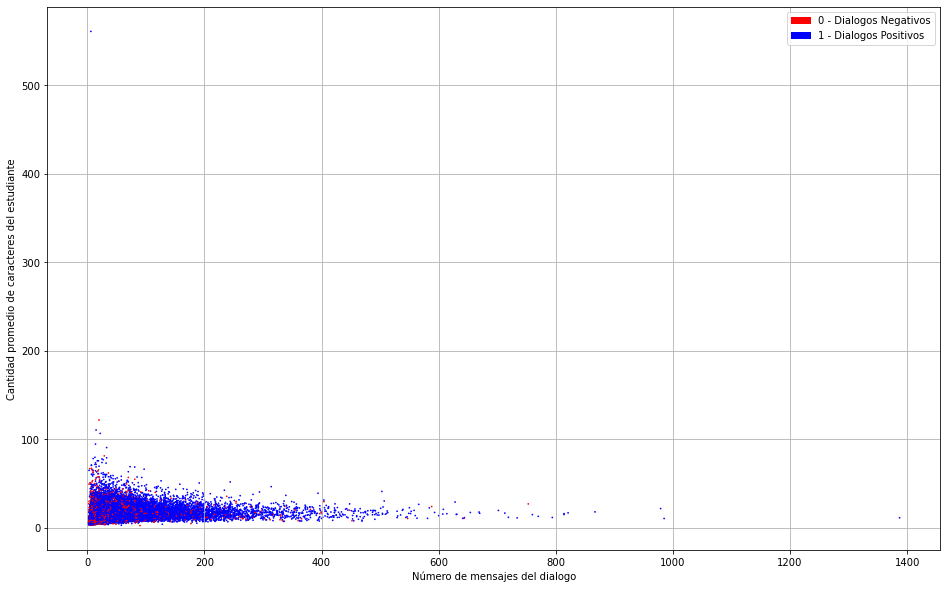

In [ ]:
cmap = colors.ListedColormap(['red','blue'])
#1. Visualizamos los datos
plt.figure(figsize=(16, 10))
plt.scatter(dialogos['n_msg'], dialogos['avg_chars_student'], c=dialogos['student_rating_cat'], cmap=cmap, s=0.5, marker='o')
plt.xlabel('Número de mensajes del dialogo')
plt.ylabel('Cantidad promedio de caracteres del estudiante')
plt.grid(True)
clases = ['0 - Dialogos Negativos','1 - Dialogos Positivos']
clases_colores = ['r','b']
recs = []
for i in range(0,len(clases_colores)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=clases_colores[i]))
plt.legend(recs,clases)

plt.show()

En el gráfico anterior nos interesa observar cómo se distribuyen los diálogos negativos y positivos, pero nos es posible diferenciar con claridad los puntos correspondientes a una u otra categoría ya que existe overlapping entre los mismos. También se observa que existen outliers o valores extremos para `x` > 800 y para `y` > 100. En el siguiente paso, eliminaremos los outliers, es decir las observaciones cuyo número de mensajes por diálogo supere los 800 y aquellas cuyo promedio de caracteres del estudiante sea mayor a 100. Por último, volveremos a graficar.

In [ ]:
#2. Eliminamos los valores extremos
dialogos_so = dialogos
dialogos_so = dialogos_so.drop(dialogos_so[dialogos_so['n_msg'] > 800].index) 
dialogos_so = dialogos_so.drop(dialogos_so[dialogos_so['avg_chars_student'] > 100].index)

Luego de haber eliminado los valores extremos, vamos a visualizar  nuevamente el primer gráfico para verificar si es posible distinguir con mayor claridad los valores pertenecientes a una u otra categoría.

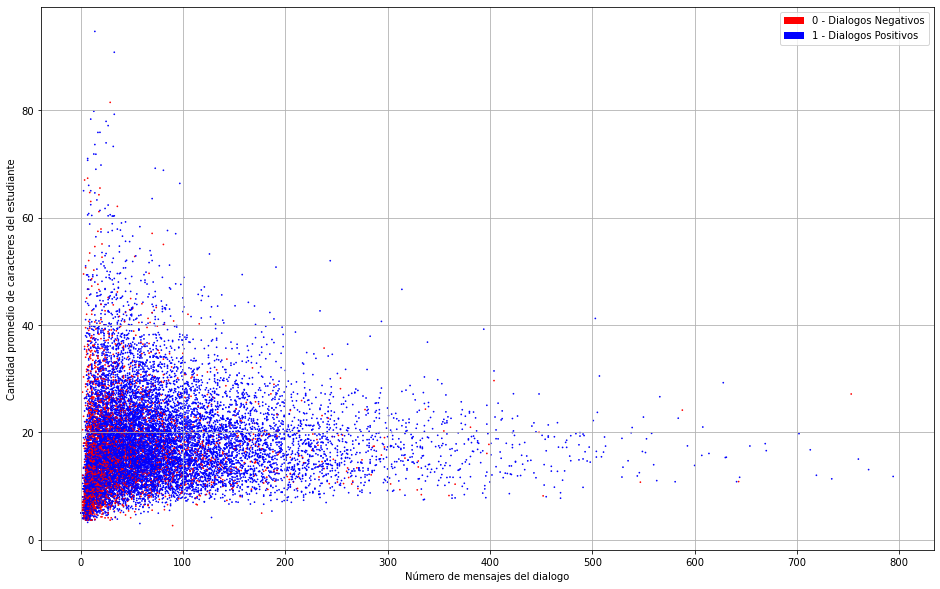

In [ ]:
#3. Visualizamos los datos sin los valores extremos
plt.figure(figsize=(16, 10))
plt.scatter(dialogos_so['n_msg'], dialogos_so['avg_chars_student'], c=dialogos_so['student_rating_cat'], cmap=cmap, s=0.5, marker='o')
plt.xlabel('Número de mensajes del dialogo')
plt.ylabel('Cantidad promedio de caracteres del estudiante')
plt.grid(True)
clases = ['0 - Dialogos Negativos','1 - Dialogos Positivos']
clases_colores = ['r','b']
recs = []
for i in range(0,len(clases_colores)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=clases_colores[i]))
plt.legend(recs,clases)
plt.show()

Finalmente, a simple vista se evidencia que existen mayor cantidad de valores correspondientes a diálogos calsificados como positivos y que la mayor cantidad de mensajes se concentra en el intervalo [0,100].

## 6. Conclusiones

Teniendo en cuenta el último gráfico, a simple vista se evidencia que existe mayor cantidad de valores correspondientes a diálogos clasificados como positivos y que la mayor cantidad de mensajes se concentra principalmente en el intervalo de [0,100]. También se evidencia que los datos no son linealmente separables y que no es posible determinar con claridad agrupamientos que nos permitan identificar las caterísticas de cada uno. 